# Horn Radio Telescope Spectra Plotting Examples

### Glen Langston, 2022 February 7
This example plots observations already taken and in the <b>data</b> directory.
After running this example to see how the softare works, copy your observations to a new directory.  Then update this notebook and admire your beautiful discoveries.

This notebook shows examples of plotting horn observations of neutral hydrogen in our Milky Way galaxy.  The notebook expects to read data in Radio Astronomy Service (RAS) ascii format.   There are two file types, Astronomy observations (.ast) and Calibration, Hot-load, observations (.hot).  The files have exactly the same format except that the .hot observations are made while the horn is pointed towards the ground, elevation < 0.

The calibration methods assume the observations of the ground will see the temperature of the Earth, about 290 Kelvins (about 63 Fahrenheit).   The actual measurement is the sum of the _Receiver_ temperature plus the ground.

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [20]:
# This command is needed when wworking within the Google Collaboratory
# I (Glen Langston) do not fully understand how to access a notebook within
# the collaboratory, so have to reload all the data and 
# support functions each time)
!git clone https://www.github.com/glangsto/jupyter
% cd jupyter

Cloning into 'jupyter'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 174 (delta 63), reused 129 (delta 25), pack-reused 0
Receiving objects: 100% (174/174), 5.38 MiB | 23.25 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/content/jupyter/jupyter


To make observations in this format, install the West Virginia University Radio Astronomy Instrumentation Laboratory
software available at https://www.github.com/WVURAIL/gr-radio_astro

In [1]:
#Sometimes new packages are flagged as missing the first time the astronomy code is
#imported.   If a package is missing, uncomment these lines and test the installation.
#The ! command indicates the command is executed on the "command line", not in the notebook
!pip install ephem
import ephem

!pip install PyAstronomy
import PyAstronomy

# add any more packages you need here.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
# Import the Radio Astronomy Service (RAS) code.
import ras

In [2]:
#Sometimes new packages are flagged as missing the first time the astronomy code is
#imported.   If a package is missing, uncomment these lines and test the installation.
#The ! command indicates the command is executed on the "command line", not in the notebook
#!pip3 install ephem
import ephem

In [3]:
# To simpify working with observations in different directories the "rasnames"
# package will search for .ast and .hot files in lists of directories, as well as a list of
# file names
import rasnames

In [4]:
# now create a Plot object
p = ras.Plot(doDebug=False)

In [5]:
# without arguemnts the plot object lists the command line options
names = p.help("")

ras.help(flags): Plotting Inputs for telescope obs.
Usage: .help('<flags> <files>')
Where <flags> are:
-A <hotfile> <coldfile>
-B <sample> Set first sample to plot (default is 1/4 of samples)
-BASE  Fit and remove a spectral baseline
-C optionally flag the center of the band
-E <sample> Set last sample to plot (default is end of samples)
-G <Range> Set +/- Galactic Range (degrees) acceptable for average
-GLON <Longitude> Galactic Longitude (degrees) center for averaging
-GLAT <Latitude> Galactic Latitude (degrees) center for averaging
-H optionally set the high velocity region for baseline fit
-I <integration time> Time (seconds) to average observations before plotting
-K <dir> optionally keep average hot and cold load calibration observations
-L optionally set the low velocity region for baseline fit
-N <number> optionally set the number of spectra to plot
-O <dir> optionally output intermediate, average files
-P <dir> write PNG and PDF files instead of showing plot
-Q optionally plot

In [6]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
p.help("-R -C -I 600.")

Flagging RFI
Interpolate center of spectra
Spectral integration time for averaging:    600.0 s


In [7]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
datadir = "data"
files, count = rasnames.splitNames(datadir, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Frequency
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:10:51 180.0,-40.0  301.3,-27.5    1.863    1.621   1800000
18:23:58 180.0,-40.0  301.2,-27.4    1.891    1.643   1800000
18:37:04 180.0,-40.0  301.2,-27.4    1.952    1.693   1800000
18:50:11 180.0,-40.0  301.2,-27.3    1.977    1.714   1800000
19:06:02 180.0,-40.0  301.1,-27.2    1.968    1.707   1080000
19:19:09 180.0, 60.0   37.5,  9.6    0.846    0.707   2160000
19:32:15 180.0, 60.0   38.9,  6.7    0.841    0.706   2160000
19:45:22 180.0, 60.0   40.4,  3.8    0.827    0.701   2160000
19:58:28 180.0, 60.0   41.9,  0.9    0.810    0.697   2160000


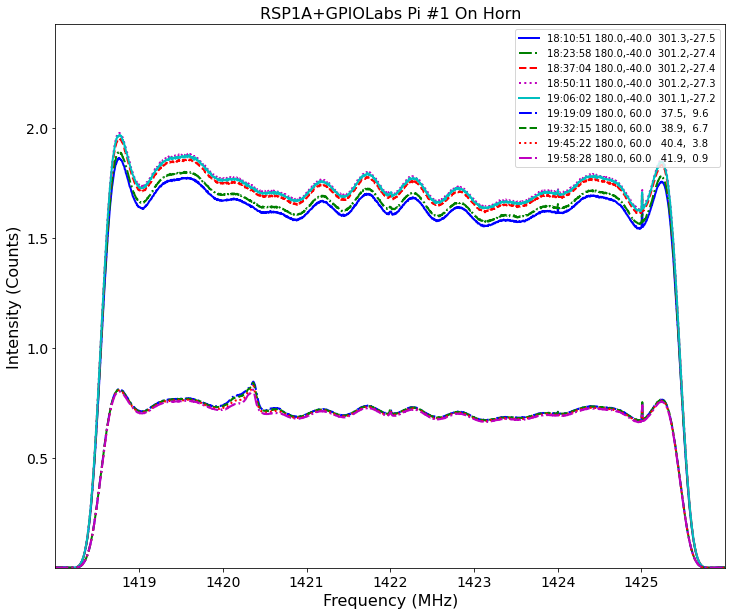

In [8]:
p.raw(files)

In [10]:
# Show your current working directory
%pwd
# Change to a dirctory with your data (Commented out)
#%cd mydata

# ie %cd '/Users/glangsto/Research/jupyter'


'/Users/glangsto/Desktop/Research/jupyter'

### When you have your own observations, you'll add a few lines here to change directories
In the mean time, we'll look at calibration of older data, provided

In [11]:
# create yet another plot class
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for a number seconds
# -G 7.5   Average data within +/- few degrees of the galactic plane
# -V plot velocity in selected range
# -BASE subtract a spectral baseline
# "data" look in the 'data' directory for the observations
keepDir="keep"
p3 = ras.Plot()
p3.help("-R -C -I 600. -V -K " + keepDir + " ")
# show the list of fine nams found

Flagging RFI
Interpolate center of spectra
Spectral integration time for averaging:    600.0 s
Plotting intensity versus Velocity
Keeping averages in directory: keep/


Found  23 Hot load observations
Ave Hot: 2048: 1.668835
Wrote Average Hot  Load File: keep/T0-20-11-28T182912.hot
No high Galactic Latitude data
Ave Cold: 2048: 0.702811
Wrote Average Cold Load File: keep/T0-20-11-28T190602.ast
Min, Max El:   60.0,  60.0 deg; Min, Max Glat:   0.25,  11.39 deg
Found 9 Cold Sky Obs.; Min El =    60.0, Low Gal Lat:     6.4
Median Receiver Temp:  195.73 +/-  1.75 ( 3.08  0.42) (K)
Ploting Intensity versus Velocity
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
19:16:32 180.0, 60.0   37.2, 10.2   245.32   206.40    -3.990  1800000
19:29:38 180.0, 60.0   38.6,  7.3   244.35   206.30    -5.479  1800000
19:42:45 180.0, 60.0   40.1,  4.4   240.74   205.02    -6.920  1800000
19:55:51 180.0, 60.0   41.6,  1.5   236.08   203.74    -7.483  1800000
19:58:28 180.0, 60.0   42.5,  0.2   233.34   203.74    -6.640   360000


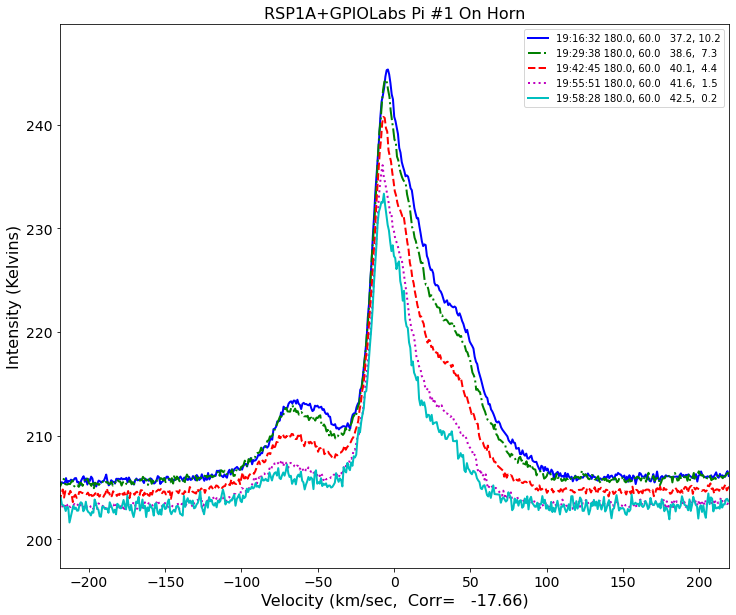

In [12]:
# now plot the average calibrated spectra for a few minutes of observations
p3.tsys(files, doDebug=False)

## To see the spectra with a baseline subtracted, update the Processing Commands

In [13]:
# Change Integration time to 15 minutes = 900 seconds
# and subtract a baseline (-BASE)
# Radio Astronomy files found in any directories are returned
p3.help("-R -C -I 900. -V -BASE ")

Flagging RFI
Interpolate center of spectra
Spectral integration time for averaging:    900.0 s
Plotting intensity versus Velocity
Fitting and subtracking a baseline


Type A: '.ast',  Type B: ''
Found 21 files name of types: '.ast' ''
Type A: '.hot',  Type B: ''
Found 23 files name of types: '.hot' ''
Found  23 Hot load observations
Ave Hot: 2048: 1.668835
Wrote Average Hot  Load File: keep/T0-20-11-28T182912.hot
Ave Cold: 2048: 0.702811
Wrote Average Cold Load File: keep/T0-20-11-28T190602.ast
Found 9 Cold Sky Obs.; Min El =    60.0, Low Gal Lat:     6.4
Median Receiver Temp:  195.73 +/-  1.75 ( 3.08  0.42) (K)
Ploting Intensity versus Velocity
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
19:21:46 180.0, 60.0   37.5,  9.6    39.49     0.68    -5.116  2520000
19:40:07 180.0, 60.0   39.5,  5.6    37.95     0.79    -6.349  2520000
19:58:28 180.0, 60.0   41.6,  1.5    32.79     0.45    -7.483  2520000


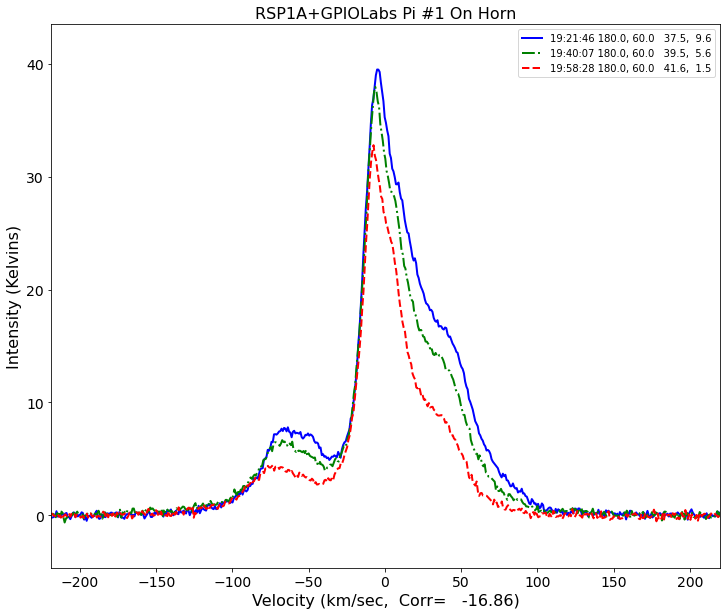

In [16]:
# now plot the average calibrated spectra again
p3.tsys(files)

In [15]:
# save the figure to put in your publications!
p3.savefig("RealIntensityVsVelocity.png")

# Congratulations!
### You've looked at some real observations with a horn radio telescope, like the one you are building.
### The lumps in your Intenisty-versus-Velocity plot prove you've discovered the Spiral Arms in the Milky Way!